<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/1_Demanda_interest_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install quandl

#Demanda

Mostra como as participações em consumo, investimentos e gastos governamentais no PIB mudaram ao longo do tempo no Reino Unido de 1948 a 2010. A parcela de consumo abaixo mostra como Usamos a forma durante o período; o investimento de forma moderada e a parcela de gastos do governo sobem ao longo do período.

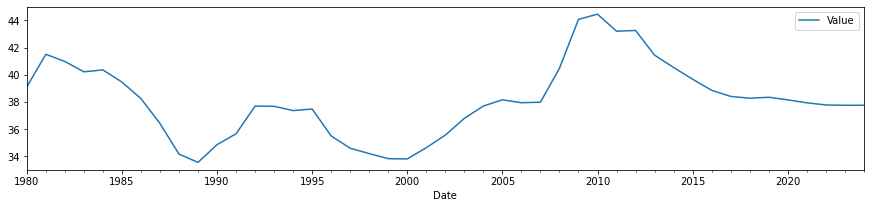

In [ ]:
import quandl
quandl.ApiConfig.api_key = 'Pu37EMDt2nmtD7bZ2FjM'
uk_gov_exp_pgpd = quandl.get('ODA/GBR_GGX_NGDP')
uk_gov_exp_pgpd.plot(figsize=(15,3))

A produção (ou PIB), o consumo (C), o investimento (I)incluindo as trocas de matérias-primas e de produtos acabados, os gastos do governo (G) e as exportações líquidas (X - M). Essa é uma identidade, pois simplesmente descreve o PIB em seus componentes constituintes.
$$
Y \equiv C+I+G+(X-M)
$$

Ciclos de negócios nos Estados Unidos entre 1948 e 2010 (painel superior) e crescimento do PIB real (painel inferior).

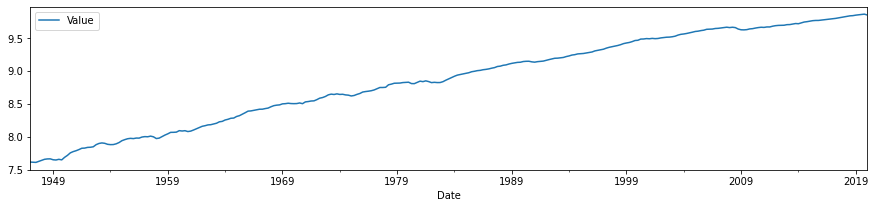

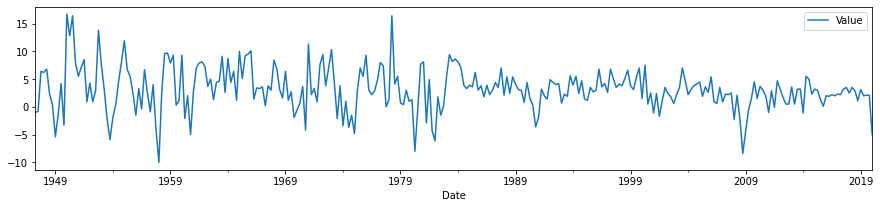

In [ ]:
from numpy import log
usa_gdp_log = log(quandl.get('FRED/GDPC1'))
usa_gdp_log.plot(figsize=(15,3))

usa_gdp_grow = quandl.get('FRED/A191RL1Q225SBEA')
usa_gdp_grow.plot(figsize=(15,3))

##Curva de demanda IS
O I significa investimento e S a poupança.

Uma economia fechada pode ser representado pela equação
$$
\begin{aligned}
y^D &= C + I + G 
\end{aligned}\tag{1}
$$
no equlíbrio de mercado  $Y=y^D$
\
\
$y^D$ também pode ser representado como DA - demanda agregada.
# Consumo agregado linear
$$
\begin{aligned}
C &= c_0 + c_1(y - T), \\
\end{aligned}\tag{2}
$$
onde, $T=ty$ é taxa líquida de transferência - representando a tributação sobre a renda, $0<t<1$ e $0<c_1<1$ . Substituindo  equação (2) em (1) no equilíbrio teremos,
$$
\begin{aligned}
y &= c_0 + c_1(y - ty) + I + G\\ 
y &= c_0 + c_1(1 - t)y + I + G\\
\end{aligned}\tag{3}
$$
$$
\begin{aligned}
(1 - c_1(1 - t))y &= c_0 +  I + G\\
\end{aligned}\tag{4}
$$
$$
\begin{aligned}
y &= \frac{c_0 + I + G}{1 - c_1(1 - t)},\\
\end{aligned}\tag{5}
$$
podemos escrever 
$$
\begin{aligned}
y &= \frac{1}{1 - c_1(1 - t)}(c_0 + I + G).\\
\end{aligned}\tag{6}
$$

Definimos o multiplicador,
$$
\begin{aligned}
\kappa &= \frac{1}{1 - c_1(1 - t)}.\\
\end{aligned}\tag{7}
$$
e a demanda autonoma (DA)
$$
\begin{aligned}
\text{DA} &= (c_0 + I + G).\\
\end{aligned}\tag{8}
$$
 
# Variação de $y$
$$
\begin{aligned}
\Delta y &=\Delta y_1+\Delta y_2+\dots+\Delta y_n+\dots .\\
\Delta y &=\Delta G+(1 - c_1(1 - t))\Delta G+(1 - c_1(1 - t))^2\Delta G\dots+(1 - c_1(1 - t))^n\Delta G+\dots .\\
\Delta y &=(1+(1 - c_1(1 - t))+(1 - c_1(1 - t))^2\dots+(1 - c_1(1 - t))^n+\dots)\Delta G .\\
\Delta y &=\sum_{k=0}^{\infty}(1 - c_1(1 - t))^k\Delta G .\\
\end{aligned}\tag{9}
$$
o somatório $\sum_{k=0}^{\infty}(1 - c_1(1 - t))^k$ é uma série infinita geométrico com termo geral $a_n=1$ e raio de convergência $r=1 - c_1(1 - t))<1$, portanto convergente com soma $S=\frac{1}{1-r}$.  

$$
\begin{aligned}
S &= \frac{1}{1 - c_1(1 - t)}.\\
\end{aligned}\tag{10}
$$
sendo $S$ igual ao multiplicador $\kappa$, restando assim,  
$$
\begin{aligned}
\Delta y &= \frac{1}{1 - c_1(1 - t)}\Delta G.\\
\Delta y &= \kappa\Delta G.\\
\end{aligned}\tag{11}
$$

# Curva IS
$$
\begin{aligned}
y &= \frac{1}{1 - c_1(1 - t)}(c_0 + I + G).\\
\end{aligned}\tag{6}
$$
Definindo a função investimento
$$
\begin{aligned}
I &= a_0-a_1 r,\\
\end{aligned}\tag{6}
$$
portanto
$$
\begin{aligned}
y &= \frac{1}{1 - c_1(1 - t)}(c_0 + a_0 - a_1 r + G).\\
\end{aligned}\tag{6}
$$
$$
\begin{aligned}
y &=\kappa\left(c_{0}+a_{0}+G\right)-\kappa a_{1} r \\
&=A-a r
\end{aligned}
$$
onde,
$$
\begin{aligned}
A &=k\left(c_0+a_0+G\right) \\
a &= \kappa a_1
\end{aligned}
$$

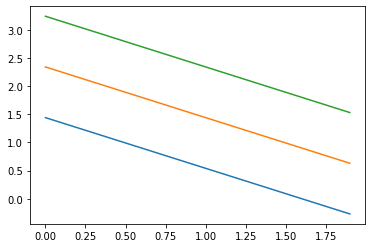

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def IS (r, k=0.9, c0=0.6, a0=1, a1=1, G=0):
  return k*(c0+a0+G) - k*a1*r

juros_r = np.arange(0,2,0.1)
plt.plot(juros_r, IS(juros_r))
plt.plot(juros_r, IS(juros_r,G=1))
plt.plot(juros_r, IS(juros_r,G=2))

[ 1.44  1.35  1.26  1.17  1.08  0.99  0.9   0.81  0.72  0.63  0.54  0.45
  0.36  0.27  0.18  0.09  0.   -0.09 -0.18 -0.27]


![alt text](https://pbs.twimg.com/media/Ea1c1vCWsAI-jeW?format=jpg&name=large)